In [1]:
pip install pennylane

     |████████████████████████████████| 580 kB 5.2 MB/s 


In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import GradientDescentOptimizer

In [3]:
dev = qml.device("default.qubit", wires=2)

In [4]:
def ansatz(var):
    qml.Rot(0.3, 1.8, 5.4, wires=1)
    qml.RX(var[0], wires=0)
    qml.RY(var[1], wires=1)
    qml.CNOT(wires=[0, 1])

In [5]:
@qml.qnode(dev)
def circuit_X(var):
    ansatz(var)
    return qml.expval(qml.PauliX(1))


@qml.qnode(dev)
def circuit_Y(var):
    ansatz(var)
    return qml.expval(qml.PauliY(1))

In [6]:
# The cost function to be optimized in VQE is simply a linear combination
# of the expectations, which defines the expectation of the Hamiltonian we
# are interested in. In our case, we square this cost function to provide
# a more interesting landscape with the same minima.


def cost(var):
    expX = circuit_X(var)
    expY = circuit_Y(var)
    return (0.1 * expX + 0.5 * expY) ** 2

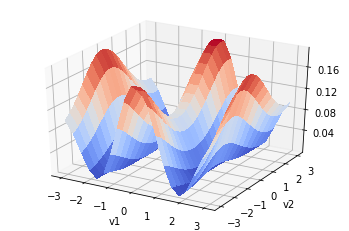

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection="3d")

X = np.linspace(-3.0, 3.0, 20)
Y = np.linspace(-3.0, 3.0, 20)
xx, yy = np.meshgrid(X, Y)
Z = np.array([[cost([x, y]) for x in X] for y in Y]).reshape(len(Y), len(X))
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel("v1")
ax.set_ylabel("v2")
ax.zaxis.set_major_locator(MaxNLocator(nbins=5, prune="lower"))

plt.show()

In [8]:
opt = GradientDescentOptimizer(0.5)

var = [0.3, 2.5]
var_gd = [var]
for it in range(20):
    var = opt.step(cost, var)
    var_gd.append(var)

    print(
        "Cost after step {:5d}: {: .7f} | Variables: [{: .5f},{: .5f}]".format(
            it + 1, cost(var), var[0], var[1]
        )
    )

Cost after step     1:  0.1737355 | Variables: [ 0.34699, 2.49206]
Cost after step     2:  0.1675543 | Variables: [ 0.40033, 2.48402]
Cost after step     3:  0.1598003 | Variables: [ 0.46035, 2.47592]
Cost after step     4:  0.1502869 | Variables: [ 0.52718, 2.46780]
Cost after step     5:  0.1389376 | Variables: [ 0.60056, 2.45973]
Cost after step     6:  0.1258558 | Variables: [ 0.67982, 2.45179]
Cost after step     7:  0.1113782 | Variables: [ 0.76374, 2.44405]
Cost after step     8:  0.0960798 | Variables: [ 0.85059, 2.43661]
Cost after step     9:  0.0807058 | Variables: [ 0.93826, 2.42956]
Cost after step    10:  0.0660363 | Variables: [ 1.02448, 2.42297]
Cost after step    11:  0.0527307 | Variables: [ 1.10710, 2.41691]
Cost after step    12:  0.0412146 | Variables: [ 1.18438, 2.41141]
Cost after step    13:  0.0316476 | Variables: [ 1.25514, 2.40648]
Cost after step    14:  0.0239656 | Variables: [ 1.31877, 2.40210]
Cost after step    15:  0.0179609 | Variables: [ 1.37518, 2.39

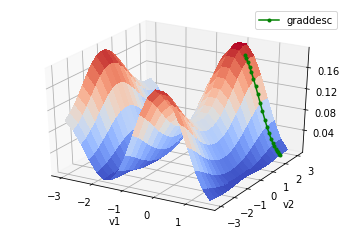

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection="3d")

X = np.linspace(-3, np.pi / 2, 20)
Y = np.linspace(-3, 3, 20)
xx, yy = np.meshgrid(X, Y)
Z = np.array([[cost([x, y]) for x in X] for y in Y]).reshape(len(Y), len(X))

surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, antialiased=False)

path_z = [cost(var) + 1e-8 for var in var_gd]
path_x = [v[0] for v in var_gd]
path_y = [v[1] for v in var_gd]
ax.plot(path_x, path_y, path_z, c="green", marker=".", label="graddesc", zorder=10)

ax.set_xlabel("v1")
ax.set_ylabel("v2")
ax.zaxis.set_major_locator(MaxNLocator(nbins=5, prune="lower"))

plt.legend()
plt.show()

In [10]:
def ansatz():
    qml.Rot(0.3, 1.8, 5.4, wires=1)
    qml.RX(-0.5, wires=0)
    qml.RY(0.5, wires=1)
    qml.CNOT(wires=[0, 1])


@qml.qnode(dev)
def circuit_X():
    ansatz()
    return qml.expval(qml.PauliX(1))


@qml.qnode(dev)
def circuit_Y():
    ansatz()
    return qml.expval(qml.PauliY(1))

In [11]:
def cost(var):
    expX = circuit_X()
    expY = circuit_Y()
    return (var[0] * expX + var[1] * expY) ** 2


opt = GradientDescentOptimizer(0.5)

var = [0.3, 2.5]
var_gd = [var]
for it in range(20):
    var = opt.step(cost, var)
    var_gd.append(var)

    print(
        "Cost after step {:5d}: {: .7f} | Variables: [{: .5f},{: .5f}]".format(
            it + 1, cost(var), var[0], var[1]
        )
    )

Cost after step     1:  0.3269168 | Variables: [ 0.95937, 1.49547]
Cost after step     2:  0.0461959 | Variables: [ 1.20723, 1.11786]
Cost after step     3:  0.0065278 | Variables: [ 1.30040, 0.97591]
Cost after step     4:  0.0009224 | Variables: [ 1.33543, 0.92255]
Cost after step     5:  0.0001303 | Variables: [ 1.34859, 0.90250]
Cost after step     6:  0.0000184 | Variables: [ 1.35354, 0.89496]
Cost after step     7:  0.0000026 | Variables: [ 1.35540, 0.89212]
Cost after step     8:  0.0000004 | Variables: [ 1.35610, 0.89106]
Cost after step     9:  0.0000001 | Variables: [ 1.35636, 0.89066]
Cost after step    10:  0.0000000 | Variables: [ 1.35646, 0.89051]
Cost after step    11:  0.0000000 | Variables: [ 1.35650, 0.89045]
Cost after step    12:  0.0000000 | Variables: [ 1.35651, 0.89043]
Cost after step    13:  0.0000000 | Variables: [ 1.35652, 0.89042]
Cost after step    14:  0.0000000 | Variables: [ 1.35652, 0.89042]
Cost after step    15:  0.0000000 | Variables: [ 1.35652, 0.89

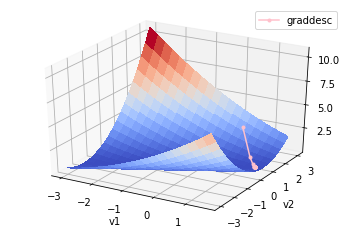

In [12]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection="3d")

X = np.linspace(-3, np.pi / 2, 20)
Y = np.linspace(-3, 3, 20)
xx, yy = np.meshgrid(X, Y)
Z = np.array([[cost([x, y]) for x in X] for y in Y]).reshape(len(Y), len(X))
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, antialiased=False)

path_z = [cost(var) + 1e-8 for var in var_gd]
path_x = [v[0] for v in var_gd]
path_y = [v[1] for v in var_gd]
ax.plot(path_x, path_y, path_z, c="pink", marker=".", label="graddesc", zorder=10)

ax.set_xlabel("v1")
ax.set_ylabel("v2")
ax.zaxis.set_major_locator(MaxNLocator(nbins=5, prune="lower"))

plt.legend()
plt.show()

In [13]:
# Finally, we can optimize *classical* and *quantum* weights together by
# combining the two approaches from above.


def ansatz(var):

    qml.Rot(0.3, 1.8, 5.4, wires=1)
    qml.RX(var[0], wires=0)
    qml.RY(var[1], wires=1)
    qml.CNOT(wires=[0, 1])


@qml.qnode(dev)
def circuit_X(var):
    ansatz(var)
    return qml.expval(qml.PauliX(1))


@qml.qnode(dev)
def circuit_Y(var):
    ansatz(var)
    return qml.expval(qml.PauliY(1))


def cost(var):

    expX = circuit_X(var)
    expY = circuit_Y(var)

    return (var[2] * expX + var[3] * expY) ** 2


opt = GradientDescentOptimizer(0.5)
var = [0.3, 2.5, 0.3, 2.5]

for it in range(10):
    var = opt.step(cost, var)
    print("Cost after step {:5d}: {: 0.7f}".format(it + 1, cost(var)))

Cost after step     1:  0.1978826
Cost after step     2:  0.0008013
Cost after step     3:  0.0000028
Cost after step     4:  0.0000000
Cost after step     5:  0.0000000
Cost after step     6:  0.0000000
Cost after step     7:  0.0000000
Cost after step     8:  0.0000000
Cost after step     9:  0.0000000
Cost after step    10:  0.0000000
